<a href="https://colab.research.google.com/github/saisrivathsav/MINI-PROJECT/blob/main/Image_Classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['elephant','lion']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join (DATADIR,category)
  for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   img_resized = resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.2,random_state=109)

from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True) 
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

1.0

In [20]:
confusion_matrix(y_pred,y_test)


array([[ 7,  0],
       [ 0, 13]])

In [21]:
from sklearn.metrics import classification_report
 
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         7\n           1       1.00      1.00      1.00        13\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

Enter your URLhttps://ichef.bbci.co.uk/news/976/cpsprodpb/1CE8/production/_109100470_ed01bd7f-0c64-4f6b-9d29-f43261119ade.jpg
(549, 976, 3)
PREDICTED OUTPUT:lion


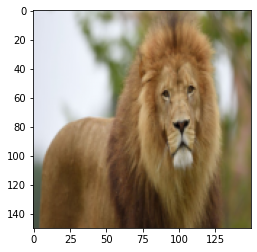

In [22]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_pred,y_test)
import pickle
pickle.dump(clf,open('img_model.p','wb'))

model = pickle.load(open('img_model.p','rb'))

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

